In [1]:
import pandas as pd
import csv
import warnings
warnings.filterwarnings("ignore")
import numpy as np

In [2]:
data = pd.read_csv("/Users/sonalichaudhari/Desktop/Churning/Data/Data_for_models.csv")

print("Churned customer     : ", data[data['Churn']==1].shape[0])
print("Non-Churned customer : ",data[data['Churn']==0].shape[0])

Churned customer     :  1869
Non-Churned customer :  5163


In [3]:
target = ['Churn']
id_col = ['customerID']

cols = [i for i in data.columns if i not in id_col + target ]

#dataframe with non negative values
X = data[cols]
y = data[target]

### Sampling
Reference

https://www.kaggle.com/qianchao/smote-with-imbalance-data

https://towardsdatascience.com/dealing-with-imbalanced-classes-in-machine-learning-d43d6fa19d2

A simple way to fix imbalanced data-sets is simply to balance them, either by oversampling instances of the minority class or undersampling instances of the majority class.

The most well known example of this is SMOTE, which actually creates new instances of the minority class by forming convex combinations of neighboring instances.

In [4]:
# Using SMOTE to split the imbalanced data
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

sm = SMOTE(random_state=2)
X_train_smote, X_test_smote,y_train_smote,y_test_smote =train_test_split(X, y, test_size=0.3, random_state=0)
Train_X_smote, Train_y_smote = sm.fit_sample(X_train_smote,y_train_smote)

In [5]:

smote_X = telcom[cols]
smote_Y = telcom[target_col]

#Split train and test data
smote_train_X,smote_test_X,smote_train_Y,smote_test_Y = train_test_split(smote_X,smote_Y,
                                                                         test_size = .25 ,
                                                                         random_state = 111)

#oversampling minority class using smote
os = SMOTE(random_state = 0)
os_smote_X,os_smote_Y = os.fit_sample(smote_train_X,smote_train_Y)
os_smote_X = pd.DataFrame(data = os_smote_X,columns=cols)
os_smote_Y = pd.DataFrame(data = os_smote_Y,columns=target_col)



NameError: name 'telcom' is not defined

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.cross_validation import cross_val_score, cross_val_predict
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Logistic Regression

In [9]:
logreg  = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
confusion = metrics.confusion_matrix(y_test, y_pred)
print(confusion)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("\nAccuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

NameError: name 'X_train' is not defined

[[1149  406]
 [ 117  438]]

Accuracy: 0.752132701421801
Precision: 0.518957345971564
Recall: 0.7891891891891892


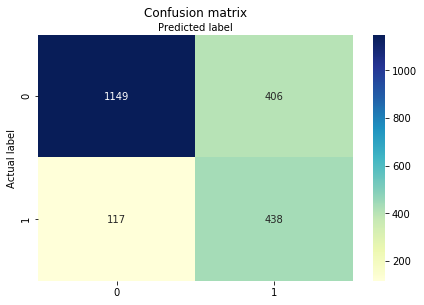

In [10]:
logreg  = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

logreg.fit(Train_X_smote,Train_y_smote)
y_pred=logreg.predict(X_test_smote)
confusion = metrics.confusion_matrix(y_test_smote, y_pred)
print(confusion)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("\nAccuracy:",metrics.accuracy_score(y_test_smote, y_pred))
print("Precision:",metrics.precision_score(y_test_smote, y_pred))
print("Recall:",metrics.recall_score(y_test_smote, y_pred))

#Cross validation

https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6

model = logreg
scores = cross_val_score(model, df, y, cv=6)
print("Cross-validated scores:", scores)

df = np.array(X_train)
y = np.array(y_train)

In [37]:
C_param_range = [0.001,0.01,0.1,1,10,100]
j=0
for i in C_param_range:
    print(i)
    lr = LogisticRegression(penalty = 'l2', C = i,random_state = 0)
    lr.fit(Train_X_smote,Train_y_smote)
    y_pred = lr.predict(X_test_smote)
    print("\nAccuracy:",metrics.accuracy_score(y_test_smote,y_pred))

0.001

Accuracy: 0.7317535545023697
0.01

Accuracy: 0.7530805687203791
0.1

Accuracy: 0.7516587677725118
1

Accuracy: 0.752132701421801
10

Accuracy: 0.752132701421801
100

Accuracy: 0.752132701421801


# SVM

In [ ]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel
clf.fit(Train_X_smote, Train_y_smote)

y_pred = clf.predict(X_test_smote)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))